<a href="https://colab.research.google.com/github/lew-monk/Insurance-Prediction/blob/main/Copy-Of-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#@Assignment three

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Import the CSV

In [ ]:
df = pd.read_csv('./Train_data.csv')
test_data = pd.read_csv('./Test_data.csv')

EDA 

In [ ]:
test_data.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,40.736173,0.008556,1679.624719,0.442781,0.127273,15.251337,2.484492,50.894118,0.785027
std,11.456842,0.092152,4273.492836,0.496981,0.333457,8.173175,3.011314,102.350034,1.961566
min,18.000000,0.000000,-999.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,0.000000,108.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000
50%,38.117035,0.000000,611.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000
75%,48.000000,0.000000,1823.400669,1.000000,0.000000,21.000000,3.000000,84.500000,1.000000
max,95.000000,1.000000,98417.000000,1.000000,1.000000,31.000000,41.000000,828.000000,31.000000


In [ ]:
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  935 non-null    float64
 1   job_type             930 non-null    object 
 2   marital_status       935 non-null    object 
 3   education_level      901 non-null    object 
 4   default_or_not       935 non-null    int64  
 5   balance_amt          935 non-null    float64
 6   household_insurance  935 non-null    int64  
 7   car_loan             935 non-null    int64  
 8   communication        770 non-null    object 
 9   last_contact_day     935 non-null    int64  
 10  last_contact_month   935 non-null    object 
 11  no_of_contacts       935 non-null    int64  
 12  days_passed          935 non-null    int64  
 13  prev_attempts        935 non-null    int64  
 14  Outcome              240 non-null    object 
 15  call_start           935 non-null    obj

In [ ]:
jobs = pd.get_dummies(test_data['job_type'])

In [ ]:
days_passed_null = test_data['days_passed'] == -1
days_passed_null.value_counts()

True     659
False    276
Name: days_passed, dtype: int64

In [ ]:
#@title
pred = pd.get_dummies(test_data['Outcome'])
pred

,failure,other,success
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0
...,...,...,...
930,0,0,0
931,0,0,0
932,0,0,0
933,0,0,0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

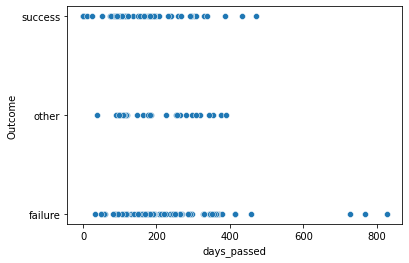

In [ ]:
sns.scatterplot(data = test_data , y = 'Outcome' , x = 'days_passed')
plt

In [ ]:
edu = pd.get_dummies(test_data['education_level'])
test_data['education_level'].isnull().value_counts()


False    901
True      34
Name: education_level, dtype: int64

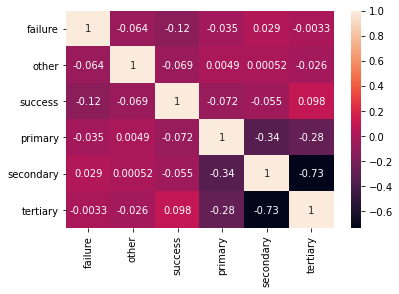

In [ ]:
df1 = pd.concat(objs = [pred, edu], axis=1)
ax = sns.heatmap(df1.corr(), annot=True)

In [ ]:
marital_dummies = pd.get_dummies(test_data['marital_status'])
marital_dummies

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
930,0,1,0
931,0,0,1
932,0,1,0
933,0,1,0


In [ ]:
test_data['communication'].head(10)

0    telephone
1          NaN
2     cellular
3     cellular
4     cellular
5     cellular
6     cellular
7     cellular
8    telephone
9    telephone
Name: communication, dtype: object

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

test_data['education_level'] = imp_mode.fit_transform(test_data[['education_level']])

test_data['education_level'].isnull().value_counts()

False    935
Name: education_level, dtype: int64

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_data['communication']= imp_mode.fit_transform(test_data[['communication']])
test_data['communication'].isnull().value_counts()

False    935
Name: communication, dtype: int64

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_data['job_type']= imp_mode.fit_transform(test_data[['job_type']])
test_data['job_type'].isnull().value_counts()

False    935
Name: job_type, dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  935 non-null    float64
 1   job_type             935 non-null    object 
 2   marital_status       935 non-null    object 
 3   education_level      935 non-null    object 
 4   default_or_not       935 non-null    int64  
 5   balance_amt          935 non-null    float64
 6   household_insurance  935 non-null    int64  
 7   car_loan             935 non-null    int64  
 8   communication        935 non-null    object 
 9   last_contact_day     935 non-null    int64  
 10  last_contact_month   935 non-null    object 
 11  no_of_contacts       935 non-null    int64  
 12  days_passed          935 non-null    int64  
 13  prev_attempts        935 non-null    int64  
 14  Outcome              240 non-null    object 
 15  call_start           935 non-null    obj

In [ ]:
test_data['Outcome'].isnull().value_counts()

True     695
False    240
Name: Outcome, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

In [ ]:
df = df.drop(columns=['Outcome'])
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  call_start           3102 non-null   object 
 15  call_end             3102 non-null   o

In [ ]:
df['education_level'] = imp_mode.fit_transform(df[['education_level']])

df['education_level'].isnull().value_counts()

False    3102
Name: education_level, dtype: int64

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['communication']= imp_mode.fit_transform(df[['communication']])
df['communication'].isnull().value_counts()

False    3102
Name: communication, dtype: int64

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['job_type']= imp_mode.fit_transform(df[['job_type']])
df['job_type'].isnull().value_counts()

False    3102
Name: job_type, dtype: int64

In [ ]:
df.head(10)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,16,may,1,-1,0,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1
5,37.000000,management,married,tertiary,0,3737.000000,0,0,cellular,7,jul,1,-1,0,10:15:03,10:18:47,1
6,30.000000,blue-collar,married,secondary,0,1.000000,0,1,cellular,9,jul,1,-1,0,10:51:56,10:57:43,0
7,21.000000,student,single,primary,0,1596.000000,0,0,cellular,26,aug,1,93,2,10:10:32,10:12:27,0
8,52.091704,admin.,married,secondary,0,101.453662,0,0,cellular,21,aug,3,-1,0,16:42:19,16:52:35,1
9,49.000000,technician,married,secondary,0,412.000000,0,0,cellular,19,aug,8,-1,0,15:33:44,15:55:17,1


In [ ]:
edu = pd.get_dummies(df['education_level'])
marital = pd.get_dummies(df['marital_status'])
job = pd.get_dummies(df['job_type'])

edu_df = pd.DataFrame(edu)
mar_df = pd.DataFrame(marital)
job_df = pd.DataFrame(job)
job_df.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,16,may,1,-1,0,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1


In [ ]:
dum = pd.concat([edu_df, job_df, mar_df], axis=1)

In [ ]:
# df = pd.concat([df, dum], axis=1)
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,10:22:20,10:24:29,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,16,may,1,-1,0,13:18:41,13:27:16,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,10:09:18,10:21:48,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop(columns= ['days_passed'])
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,prev_attempts,call_start,call_end,car_insurance,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,0,10:22:20,10:24:29,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,1,09:06:30,13:59:48,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,16,may,1,0,13:18:41,13:27:16,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,0,10:09:18,10:21:48,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,4,12:12:30,12:27:14,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop(columns= ['call_start', 'call_end'])
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,prev_attempts,car_insurance,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,16,may,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop(columns= ['last_contact_day', 'last_contact_month'])
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,no_of_contacts,prev_attempts,car_insurance,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,3,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.head(10)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,no_of_contacts,prev_attempts,car_insurance,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,3,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,37.000000,management,married,tertiary,0,3737.000000,0,0,cellular,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,30.000000,blue-collar,married,secondary,0,1.000000,0,1,cellular,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7,21.000000,student,single,primary,0,1596.000000,0,0,cellular,1,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,52.091704,admin.,married,secondary,0,101.453662,0,0,cellular,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9,49.000000,technician,married,secondary,0,412.000000,0,0,cellular,8,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
df = df.drop(columns= ['job_type', 'marital_status', 'education_level'])
df.head()

,age,default_or_not,balance_amt,household_insurance,car_loan,communication,no_of_contacts,prev_attempts,car_insurance,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,47.000000,0,1112.000000,1,0,cellular,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,46.031442,0,1.312372,0,1,cellular,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,36.000000,0,281.000000,1,0,cellular,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,32.000000,0,540.000000,0,1,cellular,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,30.000000,0,315.000000,1,0,cellular,3,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,cellular,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [ ]:
test_data = test_data.drop(columns= ['last_contact_day', 'last_contact_month', 'days_passed'])
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,no_of_contacts,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,2,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,cellular,2,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,1,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,2,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,12,0,NaN,14:40:26,14:41:31


In [ ]:
test_data = test_data.drop(columns= ['Outcome', 'call_start','call_end'])
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,no_of_contacts,prev_attempts
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,2,0
1,36.000000,management,married,tertiary,0,900.0,1,0,cellular,2,0
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,1,1
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,2,0
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,12,0


In [ ]:
educate_dum = pd.get_dummies(test_data['education_level'])
job_dum = pd.get_dummies(test_data['job_type'])
marital_dum = pd.get_dummies(test_data['marital_status'])

edu_df = pd.DataFrame(educate_dum)
jobDum_df = pd.DataFrame(job_dum)
marital_df = pd.DataFrame(marital_dum)

test_dum = pd.concat([edu_df, jobDum_df, marital_df], axis=1)
test_dum.head()

,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
test_data = pd.concat([test_data, test_dum], axis=1)
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,no_of_contacts,prev_attempts,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,36.000000,management,married,tertiary,0,900.0,1,0,cellular,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,12,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
test_data = test_data.drop(['marital_status', 'job_type', 'education_level'], axis=1)

test_data.head()

,age,default_or_not,balance_amt,household_insurance,car_loan,communication,no_of_contacts,prev_attempts,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,65.000000,0,20806.0,0,0,telephone,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,36.000000,0,900.0,1,0,cellular,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,37.000000,0,6771.0,0,0,cellular,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,30.065066,0,0.0,0,0,cellular,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,41.000000,0,328.0,1,0,cellular,12,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
X = df.drop(['car_insurance'], axis=1)
y = df['car_insurance']

y.head()

0    0
1    1
2    1
3    1
4    1
Name: car_insurance, dtype: int64

In [ ]:
comm_dum = pd.get_dummies(df.communication)

comm = pd.DataFrame(comm_dum)

df = pd.concat([df, comm], axis=1)
df = df.drop(['communication'], axis=1)
df.head()

,age,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,prev_attempts,car_insurance,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,cellular,telephone
0,47.000000,0,1112.000000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,46.031442,0,1.312372,0,1,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,36.000000,0,281.000000,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,32.000000,0,540.000000,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,30.000000,0,315.000000,1,0,3,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# sc = StandardScaler()
# X_test = sc.fit_transform(X_test)
# X_train = sc.fit_transform(X_train)

In [ ]:
classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
clf = DecisionTreeClassifier(random_state=42, max_depth=10 )

clf.fit(X_train, y_train)
y_dtpred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.6689453125


In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6689453125
[[295 148]
 [191 390]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       443
           1       0.72      0.67      0.70       581

    accuracy                           0.67      1024
   macro avg       0.67      0.67      0.67      1024
weighted avg       0.67      0.67      0.67      1024



In [ ]:
pred_df = pd.DataFrame({'prediction': y_pred[0:935]})

pred_df.to_csv(index = False)

'prediction\n1\n0\n0\n1\n1\n1\n0\n0\n1\n0\n1\n0\n1\n1\n0\n1\n1\n0\n0\n0\n0\n1\n1\n0\n0\n0\n0\n1\n1\n0\n1\n1\n0\n1\n0\n1\n0\n1\n1\n1\n1\n1\n0\n0\n0\n1\n0\n1\n0\n1\n1\n0\n0\n0\n1\n1\n1\n1\n1\n0\n0\n1\n1\n0\n0\n1\n1\n1\n0\n0\n1\n1\n0\n1\n1\n1\n1\n1\n1\n0\n0\n1\n1\n1\n0\n0\n1\n0\n0\n0\n0\n1\n0\n0\n0\n1\n0\n1\n1\n1\n1\n1\n1\n0\n1\n1\n1\n0\n0\n1\n1\n1\n1\n0\n1\n1\n1\n0\n1\n0\n1\n0\n1\n1\n1\n1\n0\n1\n1\n0\n0\n0\n0\n1\n1\n0\n0\n1\n1\n0\n1\n1\n1\n0\n0\n0\n1\n0\n0\n0\n0\n1\n0\n0\n1\n1\n0\n1\n0\n1\n0\n0\n0\n0\n1\n0\n1\n1\n0\n0\n1\n1\n0\n1\n1\n0\n1\n0\n0\n1\n1\n1\n1\n1\n0\n1\n1\n1\n0\n1\n1\n1\n1\n1\n0\n0\n0\n1\n0\n1\n0\n1\n1\n1\n0\n1\n1\n1\n0\n1\n1\n0\n1\n0\n0\n1\n0\n0\n0\n1\n0\n1\n0\n0\n1\n1\n1\n1\n0\n0\n0\n1\n1\n1\n0\n0\n1\n0\n1\n0\n0\n1\n0\n0\n1\n0\n1\n0\n1\n0\n0\n0\n0\n0\n1\n0\n1\n0\n0\n1\n0\n1\n1\n1\n1\n1\n1\n0\n1\n1\n0\n1\n0\n0\n0\n1\n1\n1\n0\n0\n0\n0\n1\n0\n1\n0\n1\n0\n1\n1\n1\n0\n1\n0\n0\n0\n1\n1\n0\n1\n1\n1\n1\n1\n1\n1\n0\n0\n1\n1\n1\n1\n1\n1\n0\n1\n1\n0\n1\n1\n0\n0\n0\n0\n1\n1\n1\n1\n1\n